<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import requests
import urllib.parse as req

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [108]:
query_3_1 = f'''
            SELECT
                COUNT(*)
            FROM vacancies
'''

In [109]:
df = pd.read_sql_query(query_3_1, connection)
print(f"В таблице Vacancies представлено {df['count'].iloc[0]} вакансий.")

В таблице Vacancies представлено 49197 вакансий.


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [112]:
query_3_2 = f'''
            SELECT
                COUNT(*)
            FROM employers
'''

In [116]:
df = pd.read_sql_query(query_3_2, connection)
print(f"В таблице Employers {df['count'].iloc[0]} работодатель.")

В таблице Employers 23501 работодатель.


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [117]:
query_3_3 = f'''
            SELECT 
                COUNT(*)
            FROM areas
'''

In [119]:
df = pd.read_sql_query(query_3_3, connection)
print(f"В таблице Areas {df['count'].iloc[0]} региона.")

В таблице Areas 1362 региона.


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [120]:
query_3_4 = f'''
            SELECT 
                COUNT(*)
            FROM industries
'''

In [121]:
df = pd.read_sql_query(query_3_4, connection)
print(f"В таблице Industries {df['count'].iloc[0]} сферы деятельности.")

В таблице Industries 294 сферы деятельности.


***

ВЫВОДЫ: 
* База данных представляет собой набор из пяти таблиц, некоторые связаны между собой по ключам
* Таблица Vacancies имеет наибольшее число признаков
* В таблица Indusrties представленно наименьшее количество признаков
* На каждого работодателя приходится примерно по две вакансии

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [122]:
query_4_1 = f'''
            SELECT
                a.name area,
                COUNT(*)
            FROM vacancies v
            LEFT JOIN areas a ON v.area_id = a.id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 5
'''

In [123]:
df = pd.read_sql_query(query_4_1, connection)
df

,area,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


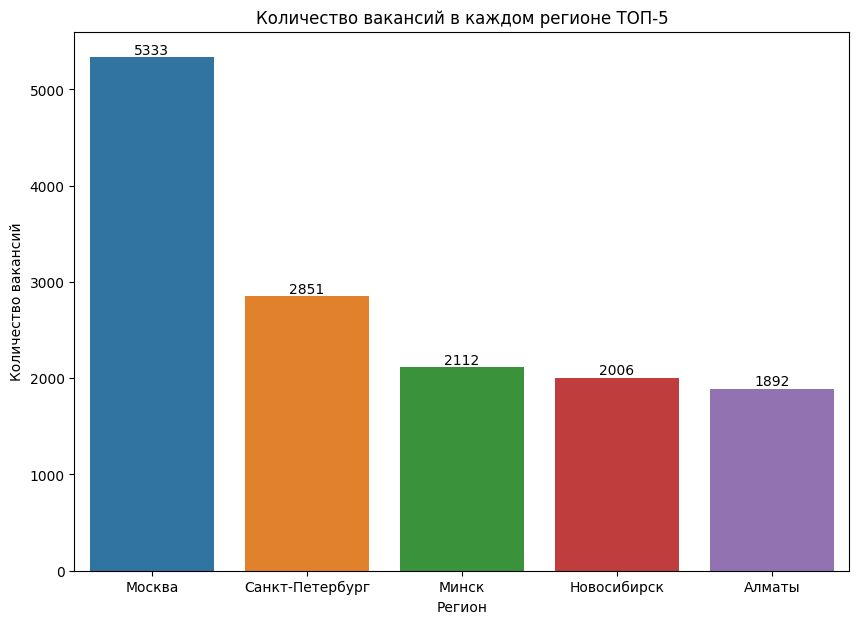

In [124]:
fig = plt.figure(figsize = (10, 7))

barplot = sns.barplot(
    data = df,
    x = 'area',
    y = 'count'
)
barplot.set_title('Количество вакансий в каждом регионе ТОП-5')
barplot.bar_label(barplot.containers[0])
barplot.set (xlabel='Регион', ylabel='Количество вакансий');

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [125]:
query_4_2 = f'''
            SELECT
                COUNT(name)
            FROM vacancies 
            WHERE salary_from IS NOT NULL 
                OR salary_to IS NOT NULL     
'''

In [126]:
df = pd.read_sql_query(query_4_2, connection)
print(f"У вакансий в количестве {df['count'].iloc[0]} заполнено одно из двух полей с зарплатой.")

У вакансий в количестве 24073 заполнено одно из двух полей с зарплатой.


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [127]:
query_4_3 = f'''
            SELECT
               AVG(salary_from) low,
               AVG(salary_to) high
            FROM vacancies    
'''

In [129]:
df = pd.read_sql_query(query_4_3, connection)
print(f"Средняя зарплата для нижней зарплатной вилки - {round(df['low'].iloc[0])} рублей.")
print(f"Cредняя зарплата для верхней зарплатной вилки - {round(df['high'].iloc[0])} рублей.")

Средняя зарплата для нижней зарплатной вилки - 71065 рублей.
Cредняя зарплата для верхней зарплатной вилки - 110537 рублей.


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [131]:
query_4_4 = f'''
            SELECT
                COUNT(*) cnt,
                schedule,
                employment
            FROM vacancies  
            GROUP BY 2, 3
            ORDER BY 1 DESC
            OFFSET 1 LIMIT 1 
'''

In [132]:
df = pd.read_sql_query(query_4_4, connection)
print(f"Для каждого сочетания типа рабочего графика и типа трудоустройства {df['cnt'].iloc[0]} вакансии.")
df

Для каждого сочетания типа рабочего графика и типа трудоустройства 7802 вакансии.


,cnt,schedule,employment
0,7802,Удаленная работа,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [133]:
query_4_5 = f'''
            SELECT
                experience,
                COUNT(*)
            FROM vacancies  
            GROUP BY 1
            ORDER BY 2
'''

In [134]:
df = pd.read_sql_query(query_4_5, connection)
df

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


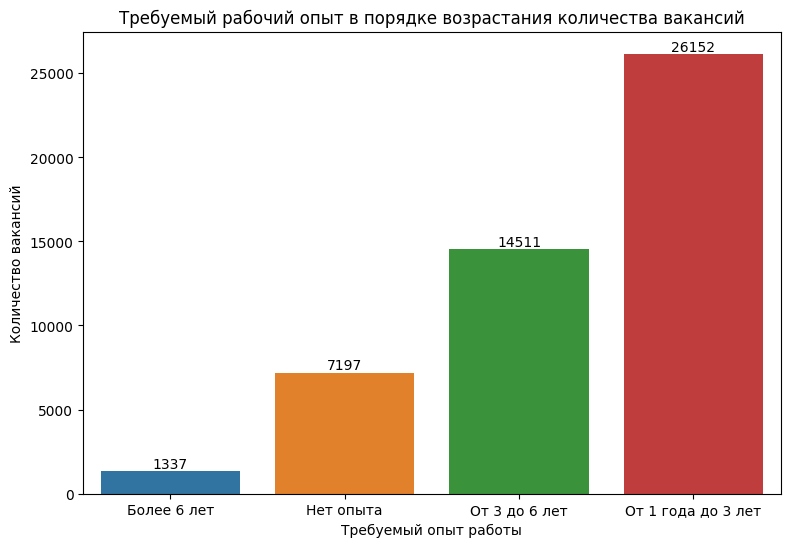

In [135]:
fig = plt.figure(figsize = (9, 6))

barplot = sns.barplot(
    data = df,
    x = 'experience',
    y = 'count'
)
barplot.set_title('Требуемый рабочий опыт в порядке возрастания количества вакансий')
barplot.bar_label(barplot.containers[0])
barplot.set (xlabel='Требуемый опыт работы', ylabel='Количество вакансий');

***

ВЫВОДЫ:
* По детальному анализу данных можно сделать вывод, что большинство вакансий представлены в крупных городах: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы и тд. Так же вакансии представлены не только по России, но и по другим странам СНГ, например, Беларусь и др. 
* Меньше, чем в половине случаев работодатели не указывают минимальную или максимальную заработную плату. Можно предположить, что этот вопрос обсуждается непосредственно на собеседовании лично.
* На первом месте количество вакансий по требуемому опыту работы в категории от 1 года до 3 лет, минимальные предложения для требуемого опыта более 6 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [136]:
query_5_1 = f'''
            (SELECT
                e.name,
                COUNT(*)
            FROM vacancies v
            JOIN employers e ON e.id = v.employer_id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1
            )
            
            UNION ALL
            
            (SELECT
                e.name,
                COUNT(*)
            FROM vacancies v
            JOIN employers e ON e.id = v.employer_id
            GROUP BY 1
            ORDER BY 2 DESC
            OFFSET 4 LIMIT 1
            )            
'''

In [137]:
df = pd.read_sql_query(query_5_1, connection)
print(f"На первом месте работодатель '{df['name'].iloc[0]}' по количеству вакансий - {df['count'].iloc[0]}.")
print(f"На пятом месте работодатель '{df['name'].iloc[1]}' по количеству вакансий - {df['count'].iloc[1]}.")
df

На первом месте работодатель 'Яндекс' по количеству вакансий - 1933.
На пятом месте работодатель 'Газпром нефть' по количеству вакансий - 331.


,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [138]:
query_5_2 = f'''
            SELECT
                a.name region,
                COUNT(e.id) cnt_employers,
                COUNT(v.id) cnt_vacancies
            FROM areas a
            LEFT JOIN vacancies v ON v.area_id = a.id
            LEFT JOIN employers e ON a.id = e.area
            WHERE v.name IS NULL
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1
'''

In [139]:
df = pd.read_sql_query(query_5_2, connection)
print(f"В регионе '{df['region'].iloc[0]}' нет вакансии, но наибольшее количество работадателей - {df['cnt_employers'].iloc[0]}.")
df

В регионе 'Россия' нет вакансии, но наибольшее количество работадателей - 410.


,region,cnt_employers,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [59]:
query_5_3 = f'''
            SELECT
                e.name employer,
                COUNT(DISTINCT v.area_id) cnt_areas
            FROM employers e
            JOIN areas a ON a.id = e.area
            JOIN vacancies v ON v.employer_id = e.id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 5
'''

In [140]:
df = pd.read_sql_query(query_5_3, connection)
df

,employer,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


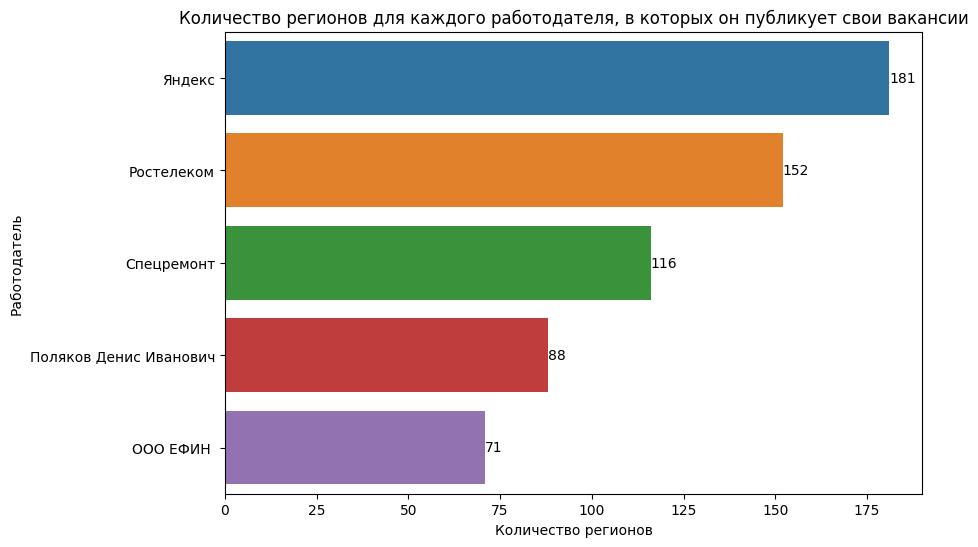

In [141]:
fig = plt.figure(figsize = (9, 6))

barplot = sns.barplot(
    data = df,
    x = 'cnt_areas',
    y = 'employer'
)
barplot.set_title('Количество регионов для каждого работодателя, в которых он публикует свои вакансии')
barplot.bar_label(barplot.containers[0])
barplot.set (xlabel='Количество регионов', ylabel='Работодатель');

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [142]:
query_5_4 = f'''
            SELECT
                COUNT(e.id) cnt_employers
            FROM employers e
            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
            WHERE ei.employer_id IS NULL
'''

In [63]:
df = pd.read_sql_query(query_5_4, connection)
print(f"Количество работодателей, у которых не указана сфера деятельности - {df['cnt_employers'].iloc[0]}.")

Количество работодателей, у которых не указана сфера деятельности - 8419.


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [143]:
query_5_5 = f'''
            SELECT
                e.name 
            FROM employers e
            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
            GROUP BY 1
            HAVING COUNT(ei.industry_id ) = 4
            ORDER BY 1
            OFFSET 2 LIMIT 1
'''

In [144]:
df = pd.read_sql_query(query_5_5, connection)
print(f"Компания {df['name'].iloc[0]} находится на третьем месте среди компаний, у которых указано четыре сферы деятельности.")

Компания 2ГИС находится на третьем месте среди компаний, у которых указано четыре сферы деятельности.


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [145]:
query_5_6 = f'''
            SELECT
                COUNT(ei.employer_id)
            FROM employers_industries ei
            LEFT JOIN industries i ON ei.industry_id = i.id
            WHERE i.name LIKE '%Разработка программного обеспечени%'
'''

In [146]:
df = pd.read_sql_query(query_5_6, connection)
print(f"У {df['count'].iloc[0]} работодателей в качестве сферы деятельности указана 'Разработка программного обеспечения'.")

У 3553 работодателей в качестве сферы деятельности указана 'Разработка программного обеспечения'.


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 


In [147]:
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
df = pd.read_html(url)[1]
cities = df['Город'].to_list()
cities[13] = 'Воронеж'
cities


['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [148]:
query_5_7 = f'''
            (SELECT
                a.name region,
                COUNT(v.id)
            FROM vacancies v
            JOIN employers e ON v.employer_id = e.id
            JOIN areas a ON a.id = v.area_id
            WHERE e.name = 'Яндекс'
                AND a.name in {tuple(cities)}
            GROUP BY 1
            ORDER BY 2 DESC
            )
            
            UNION ALL
            
            (SELECT 
                'total', 
                COUNT(*)
            FROM vacancies v
            JOIN employers e ON v.employer_id = e.id
            JOIN areas a ON a.id = v.area_id
            WHERE e.name = 'Яндекс'
                AND a.name in {tuple(cities)}
            )
'''

In [149]:
df = pd.read_sql_query(query_5_7, connection)
df

,region,count
0,total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


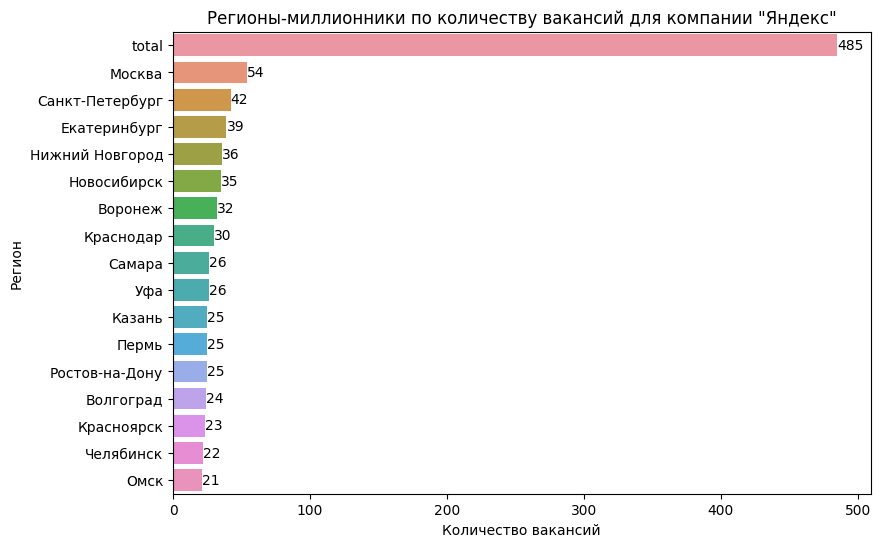

In [150]:
fig = plt.figure(figsize = (9, 6))

barplot = sns.barplot(data=df, x="count", y="region")

barplot.set_title('Регионы-миллионники по количеству вакансий для компании "Яндекс"')
barplot.bar_label(barplot.containers[0])
barplot.set (xlabel='Количество вакансий', ylabel='Регион');

***

ВЫВОДЫ:
* На первых местах находятся крупные компании, с большим штатом сотрудников, поэтому среди них и большее количество предлагаемых вакансий.
* Крупные компании, такие как "Яндекс", "Ростелеком" и тд., публикуют большинство своих вакансий в различных регионах, что указывает на широкий охват географической области деятельности.
* Только у 15% среди всех работодателей в качестве сферы деятельности указана "Разработка программного обеспечния".
* Для компании "Яндекс" среди городов-миллионников в общем количестве представлено 485 вакансий. Большинство вакансий приходится на крупные города - Москва, Санкт-Петербург и Екатеринбург, затем количество постепенно уменьшается и в среднем приходится около 25 вакансии на каждый город.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [151]:
query_6_1 = f'''
            SELECT
                COUNT(*)
            FROM vacancies
            WHERE LOWER(name) LIKE '%data%' 
                OR LOWER(name) LIKE '%данн%'    
'''

In [152]:
df = pd.read_sql_query(query_6_1, connection)
print(f"В таблице Vacancies {df['count'].iloc[0]} вакансия имеет отношение к данным с содержаением слов 'data' и 'данн'.")

В таблице Vacancies 1771 вакансия имеет отношение к данным с содержаением слов 'data' и 'данн'.


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [153]:
query_6_2 = f'''
            SELECT
                COUNT(*)
            FROM vacancies
            WHERE 
                (LOWER(name) LIKE '%data scientist%'
                OR LOWER(name) LIKE '%data science%'
                OR LOWER(name) LIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT LIKE '%HTML%')
                OR LOWER(name) LIKE '%machine learning%'
                OR LOWER(name) LIKE '%машинн%обучен%')
            AND 
                (LOWER(name) LIKE '%junior%'
                OR experience = 'Нет опыта'
                OR employment = 'Стажировка')
'''

In [154]:
df = pd.read_sql_query(query_6_2, connection)
print(f"В таблице Vacancies {df['count'].iloc[0]} вакансия для начинающих дата-сайентистов.")

В таблице Vacancies 51 вакансия для начинающих дата-сайентистов.


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [155]:
query_6_3 = f'''
            SELECT
                COUNT(*)
            FROM vacancies
            WHERE 
                (LOWER(name) LIKE '%data scientist%'
                OR LOWER(name) LIKE '%data science%'
                OR LOWER(name) LIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT LIKE '%HTML%')
                OR LOWER(name) LIKE '%machine learning%'
                OR LOWER(name) LIKE '%машинн%обучен%')
            AND 
                (LOWER(key_skills) LIKE '%sql%'
                OR LOWER(key_skills) LIKE '%postgre%')
'''

In [80]:
df = pd.read_sql_query(query_6_3, connection)
print(f"В таблице Vacancies {df['count'].iloc[0]} вакансия для DS, в которых в качестве ключевого слова указан SQL или Postgres.")

В таблице Vacancies 201 вакансия для DS, в которых в качестве ключевого слова указан SQL или Postgres.


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [156]:
query_6_4 = f'''
            SELECT
                COUNT(*)
            FROM vacancies
            WHERE 
                (LOWER(name) LIKE '%data scientist%'
                OR LOWER(name) LIKE '%data science%'
                OR LOWER(name) LIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT LIKE '%HTML%')
                OR LOWER(name) LIKE '%machine learning%'
                OR LOWER(name) LIKE '%машинн%обучен%')
            AND 
                LOWER(key_skills) LIKE '%python%'
'''

In [157]:
df = pd.read_sql_query(query_6_4, connection)
print(f"В таблице Vacancies {df['count'].iloc[0]} вакансия для DS, в которых в качестве ключевого навыка указан Python.")

В таблице Vacancies 351 вакансия для DS, в которых в качестве ключевого навыка указан Python.


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [158]:
query_6_5 = f'''
            SELECT
                ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) avg_key_skills
            FROM vacancies
            WHERE 
                name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT ILIKE '%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%'
            AND 
                key_skills IS NOT NULL
'''

In [160]:
df = pd.read_sql_query(query_6_5, connection)
print(f"В таблице Vacancies в среднем {df['avg_key_skills'].iloc[0]} вакансий для DS, в которых в качестве ключевого навыка указан Python.")

В таблице Vacancies в среднем 6.41 вакансий для DS, в которых в качестве ключевого навыка указан Python.


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [164]:
query_6_6 = f'''
            SELECT
                AVG(COALESCE(
                (salary_from + salary_to) / 2,
                salary_from,
                salary_to,
                0
                )
                ) avg_salary
            FROM vacancies
            WHERE 
                (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT LIKE '%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
            AND 
                (salary_from IS NOT NULL 
                OR salary_to IS NOT NULL)
            AND  
                experience = 'От 3 до 6 лет'
            
'''

In [165]:
df = pd.read_sql_query(query_6_6, connection)
print(f"Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату {round(df['avg_salary'].iloc[0])} рублей.")

Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату 243115 рублей.


***

ВЫВОДЫ:
* Процент вакансий для начинающего дата-сайентиста очень мал - 0.1%
* Процент вакансий для DS со знанием SQL и Postgres - 0.41%
* Процент вакансий для DS со знанием Python - 0.71%
* Среднее количество ключевых навыков вакансий для DS - 6.41

# Общий вывод по проекту

### Дополнительные исследования данных

1. Запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта.

In [166]:
query_7_1 = f'''
            SELECT
                experience,
                COUNT(*),
                ROUND(AVG(COALESCE(
                (salary_from + salary_to) / 2,
                salary_from,
                salary_to,
                0
                    )
                ), 0) avg_salary
            FROM vacancies
            WHERE 
                (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' 
                    AND name NOT LIKE '%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
            AND 
                (salary_from IS NOT NULL 
                OR salary_to IS NOT NULL)
            GROUP BY 1     
'''

In [167]:
df = pd.read_sql_query(query_7_1, connection)
df

,experience,count,avg_salary
0,Нет опыта,7,74643.0
1,От 1 года до 3 лет,28,139675.0
2,От 3 до 6 лет,27,243115.0


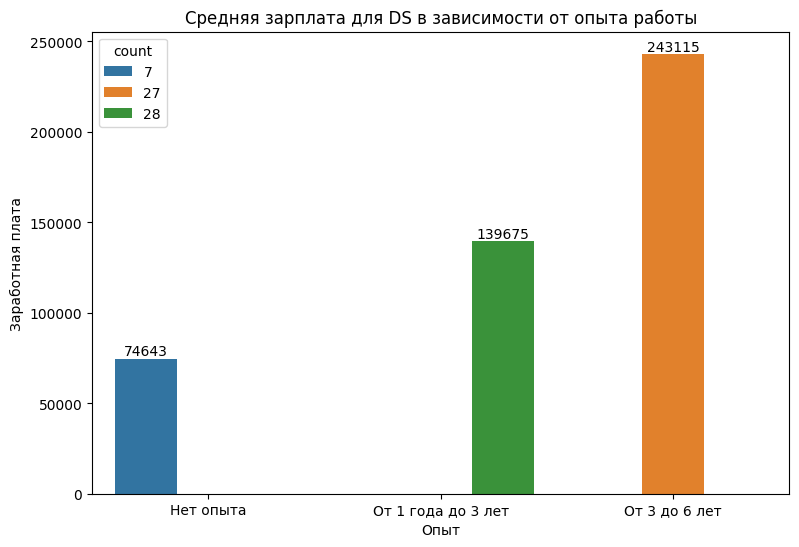

In [168]:
fig = plt.figure(figsize = (9, 6))

barplot = sns.barplot(
    x="experience", 
    y="avg_salary", 
    hue="count",  
    data=df
)

barplot.set_title('Средняя зарплата для DS в зависимости от опыта работы')
barplot.bar_label(barplot.containers[0])
barplot.bar_label(barplot.containers[1])
barplot.bar_label(barplot.containers[2])
barplot.set (xlabel='Опыт', ylabel='Заработная плата');

2. ТОП-10 самых популярных вакансий.

In [169]:
query_7_2 = f'''
            SELECT
                name,
                COUNT(*)
            FROM vacancies
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
'''

In [170]:
df = pd.read_sql_query(query_7_2, connection)
df

,name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


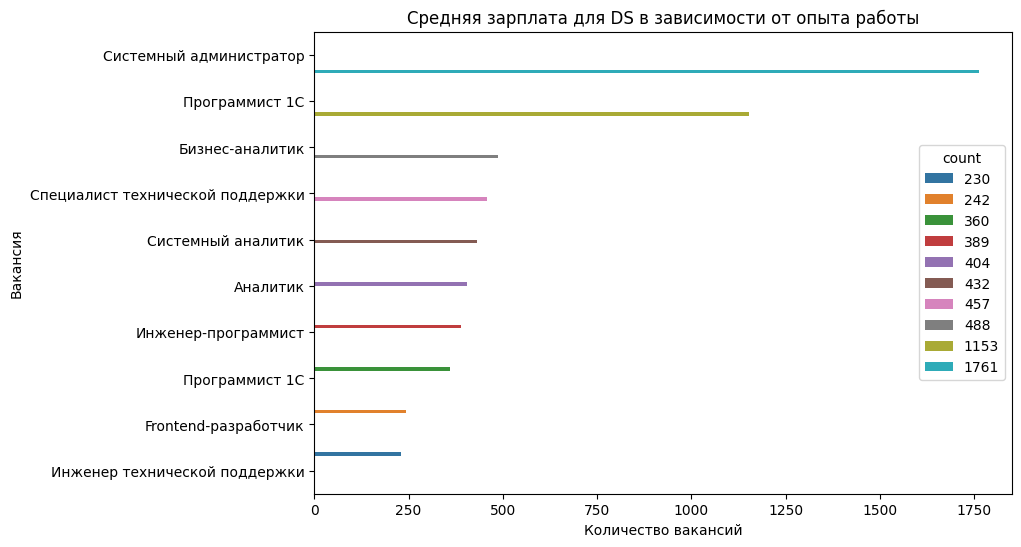

In [171]:
fig = plt.figure(figsize = (9, 6))

barplot = sns.barplot(
    x="count", 
    y="name", 
    hue="count",  
    data=df
)

barplot.set_title('Средняя зарплата для DS в зависимости от опыта работы')
barplot.set (xlabel='Количество вакансий', ylabel='Вакансия');

ОБЩИЕ ВЫВОДЫ:
* Как и ожидалось, чем выше опыт DS, тем выше его заработная плата. У специалиста со стажем от 3 до 6 лет заработная плата выше в 3 раза, чем у специалистов без опыта, но следует отметить быстрый рост у специалистов без опыта.
* Самые популярные вакансии в сфере IT, что говорит о востребованности специалистов данного сектора. Также на сегодняшний день для ведения бизнеса в других направления крайне необходимы данные специалисты.
* Также наибольшая заработная плата зависит от города, где предлагаются вакансии - чем крупнее город (города - миллионники), тем выше заработная плата среди специалистов.

In [172]:
connection.close()